In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/Users/riedesta/Desktop/healthcare_dataset.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.dtypes)


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [5]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['LengthOfStay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [6]:
avg_days = (df['Discharge Date']- df['Date of Admission']).mean()
print("Average Length of Stay:", avg_days, "days")

Average Length of Stay: 15 days 12:12:58.378378378 days


In [7]:
by_condition = df.groupby('Medical Condition')
print(by_condition.size())

Medical Condition
Arthritis       9308
Asthma          9185
Cancer          9227
Diabetes        9304
Hypertension    9245
Obesity         9231
dtype: int64


In [8]:
stay_by_condition = df.groupby('Medical Condition')['LengthOfStay'].mean()
print(stay_by_condition)

Medical Condition
Arthritis       15.517404
Asthma          15.696570
Cancer          15.495827
Diabetes        15.422936
Hypertension    15.458626
Obesity         15.464305
Name: LengthOfStay, dtype: float64


In [9]:
by_blood_type = df.groupby('Blood Type')
print(by_blood_type.size())

Blood Type
A+     6956
A-     6969
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
dtype: int64


In [10]:
monthly_trends = df.groupby(df['Date of Admission'].dt.to_period('M')).size()
print(monthly_trends)

Date of Admission
2019-05     686
2019-06     907
2019-07     957
2019-08    1001
2019-09     936
           ... 
2024-01     909
2024-02     880
2024-03     906
2024-04     946
2024-05     213
Freq: M, Length: 61, dtype: int64


<Axes: title={'center': 'Admissions Trend Over Time'}, xlabel='Date of Admission'>

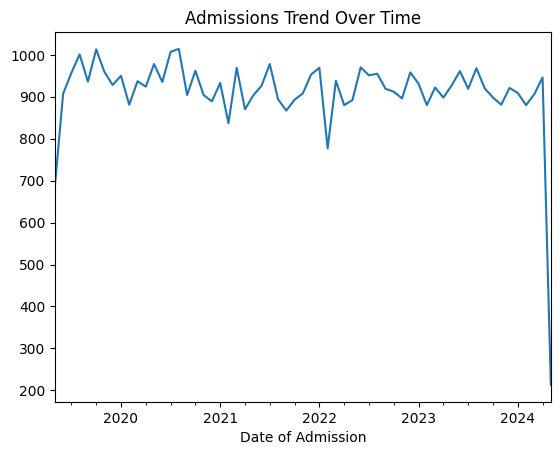

In [11]:
monthly_trends.plot(kind='line', title="Admissions Trend Over Time")


In [12]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

In [13]:
avg_age_by_condition = df.groupby('Medical Condition')['Age'].mean()
print(avg_age_by_condition)

Medical Condition
Arthritis       51.565320
Asthma          51.575830
Cancer          51.558795
Diabetes        51.554170
Hypertension    51.741915
Obesity         51.240277
Name: Age, dtype: float64


In [14]:
condition_gender = pd.crosstab(df['Medical Condition'], df['Gender'])
print(condition_gender)

Gender             Female  Male
Medical Condition              
Arthritis            4686  4622
Asthma               4553  4632
Cancer               4602  4625
Diabetes             4651  4653
Hypertension         4612  4633
Obesity              4622  4609


In [15]:
pd.crosstab(df['Medical Condition'], df['Blood Type'])

Blood Type,A+,A-,AB+,AB-,B+,B-,O+,O-
Medical Condition,,,,,,,,
Arthritis,1116,1153,1130,1192,1201,1169,1198,1149
Asthma,1135,1173,1189,1134,1108,1119,1173,1154
Cancer,1185,1134,1112,1198,1196,1144,1108,1150
Diabetes,1213,1167,1173,1139,1188,1151,1151,1122
Hypertension,1128,1199,1215,1125,1103,1173,1157,1145
Obesity,1179,1143,1128,1157,1149,1188,1130,1157


In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

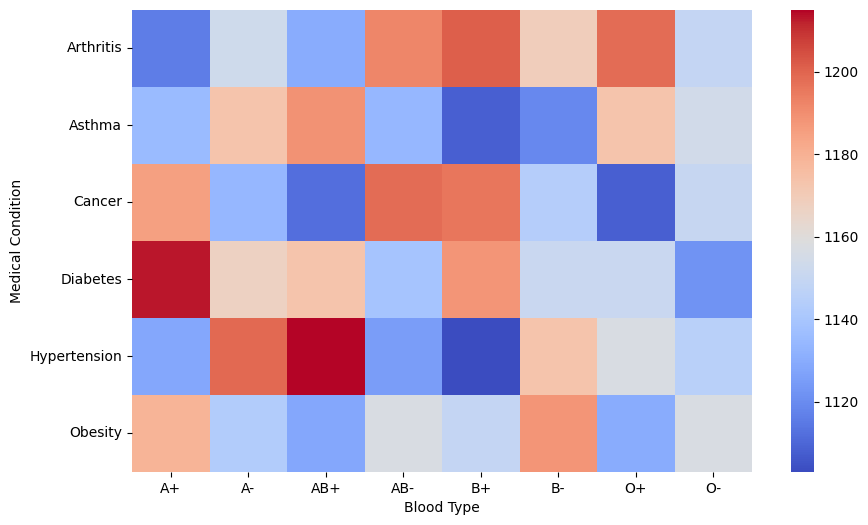

In [83]:
condition_blood = pd.crosstab(df['Medical Condition'], df['Blood Type'])
plt.figure(figsize=(10,6))
sns.heatmap(condition_blood, cmap = 'coolwarm')
plt.show()


In [18]:
condition_admission = pd.crosstab(df['Medical Condition'], df['Admission Type'])
print(condition_admission)

Admission Type     Elective  Emergency  Urgent
Medical Condition                             
Arthritis              3083       3108    3117
Asthma                 3102       3002    3081
Cancer                 3148       3015    3064
Diabetes               3058       3017    3229
Hypertension           3221       3001    3023
Obesity                3043       3126    3062


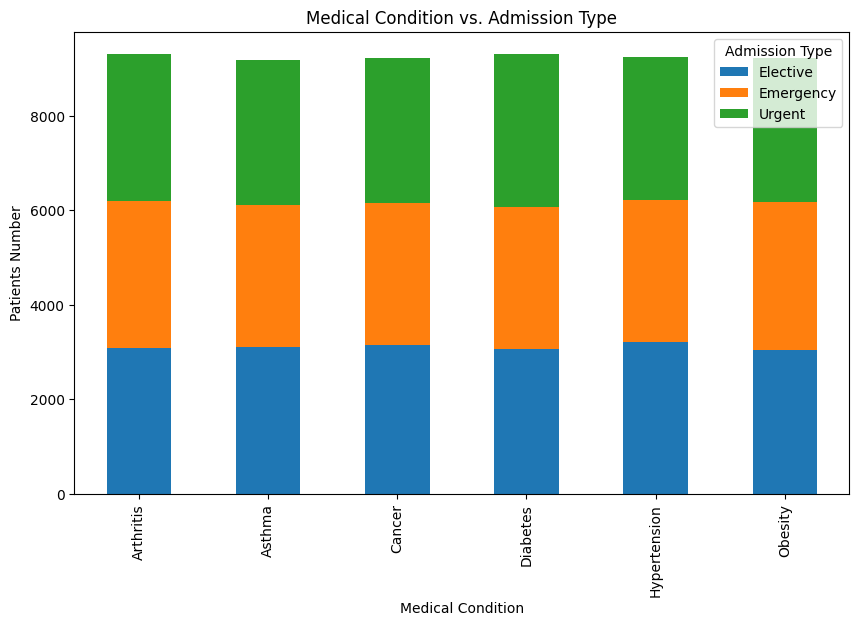

In [19]:
condition_admission.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Medical Condition vs. Admission Type")
plt.xlabel("Medical Condition")
plt.ylabel("Patients Number")

plt.show()

In [20]:
condition_gender = pd.crosstab(df['Medical Condition'], df['Gender'], normalize='index')
condition_gender = condition_gender * 100
condition_gender = condition_gender.round(1)

print(condition_gender)

Gender             Female  Male
Medical Condition              
Arthritis            50.3  49.7
Asthma               49.6  50.4
Cancer               49.9  50.1
Diabetes             50.0  50.0
Hypertension         49.9  50.1
Obesity              50.1  49.9


In [21]:
condition_medication = pd.crosstab(df['Medical Condition'], df['Medication'])
print(condition_medication)

Medication         Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Medical Condition                                                      
Arthritis             1918       1822     1825         1877        1866
Asthma                1802       1827     1823         1888        1845
Cancer                1786       1873     1922         1853        1793
Diabetes              1858       1861     1893         1811        1881
Hypertension          1865       1893     1848         1849        1790
Obesity               1865       1851     1829         1793        1893


In [22]:
avg_billing_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].mean()
print(avg_billing_by_insurance)

Insurance Provider
Aetna               25553.294506
Blue Cross          25613.011503
Cigna               25525.766314
Medicare            25615.990508
UnitedHealthcare    25389.172390
Name: Billing Amount, dtype: float64


In [23]:
condition_insurance = pd.crosstab(df['Medical Condition'], df['Insurance Provider'])
print(condition_insurance)

Insurance Provider  Aetna  Blue Cross  Cigna  Medicare  UnitedHealthcare
Medical Condition                                                       
Arthritis            1832        1852   1900      1851              1873
Asthma               1740        1835   1907      1833              1870
Cancer               1819        1808   1864      1866              1870
Diabetes             1842        1860   1893      1903              1806
Hypertension         1876        1813   1821      1847              1888
Obesity              1804        1891   1864      1854              1818


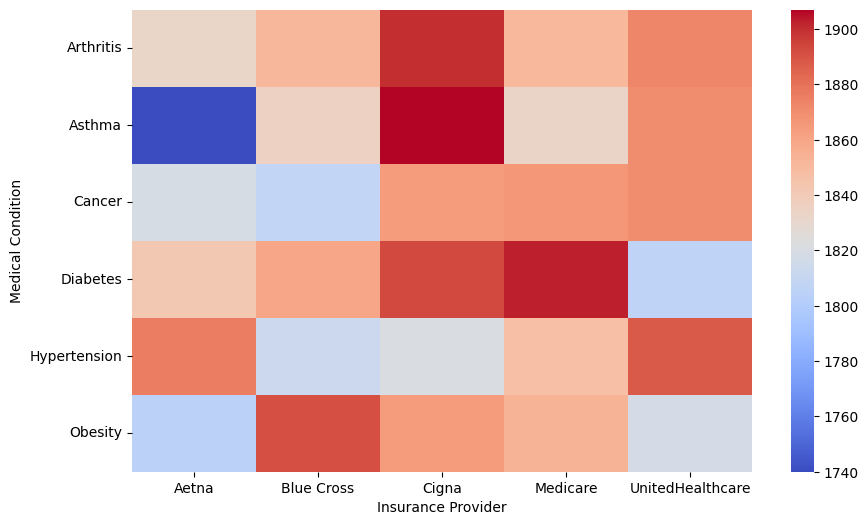

In [36]:
condition_insurance = pd.crosstab(df['Medical Condition'], df['Insurance Provider'])
plt.figure(figsize=(10,6))
sns.heatmap(condition_insurance, cmap = 'coolwarm')
plt.show()